In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import trapz
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection
from mpltools import annotation
from scipy.io import loadmat
from matplotlib.ticker import FormatStrFormatter

import csv

def cm2inch(value):
    return value / 2.54


from matplotlib import rc
import seaborn as sns
custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 0.3,
    "figure.dpi": 200,
    "text.usetex": True,
    "font.family": "serif",
    # "font.size":8,
    # 'axes.titlesize':10,
    # 'axes.labelsize':10,
}
# sns.set_context("notebook", rc={"lines.linewidth": 3})


sns.set_theme(context = "paper", style="ticks", rc=custom_params)

In [2]:
data = loadmat("DataFigureS3_PetitGap.mat", squeeze_me=True)

time_simu = data["LagTime_simu"]
C4_simu = data["C4_simu"]
Kurtosis_simu = data["Kurtosis_simu"]
i_tau1, i_tau2, i_tau3 = data["indice des \tau_1_2_3"]
A4, D4, C4 = data["coef:A4,D4,C4"]
Mean_Dpara = data["Dpara_mean"]
dxx, PDF_theo_court = data["x_theo, PDF_theo_shortTime"]
dx_1, PDF1 = data["x, PDF1"]
dx_2, PDF2 = data["x, PDF2"]
dx_3, PDF3 = data["x, PDF3"]


def gauss(x, mu, std):
    return 1 / (np.sqrt(2 * np.pi) * std) * np.exp(-((x - mu) / std) ** 2 / 2)

dtCOURT = np.linspace(1e-3, 1e2, 1000)
dtLONG = np.linspace(1e0, 5e2, 1000)

dxCOURT = np.linspace(-0.5e-6, 0.5e-6, 1000)
dxMID =  np.linspace(-4e-6, 4e-6, 1000)
dxLONG =  np.linspace(-30e-6, 30e-6, 1000)

gauss1 = gauss(x=dxCOURT, mu=0, std=np.sqrt(2*Mean_Dpara*time_simu[i_tau1]))
gauss2 = gauss(x=dxMID, mu=0, std=np.sqrt(2*Mean_Dpara*time_simu[i_tau2]))
gauss3 = gauss(x=dxLONG, mu=0, std=np.sqrt(2*Mean_Dpara*time_simu[i_tau3]))


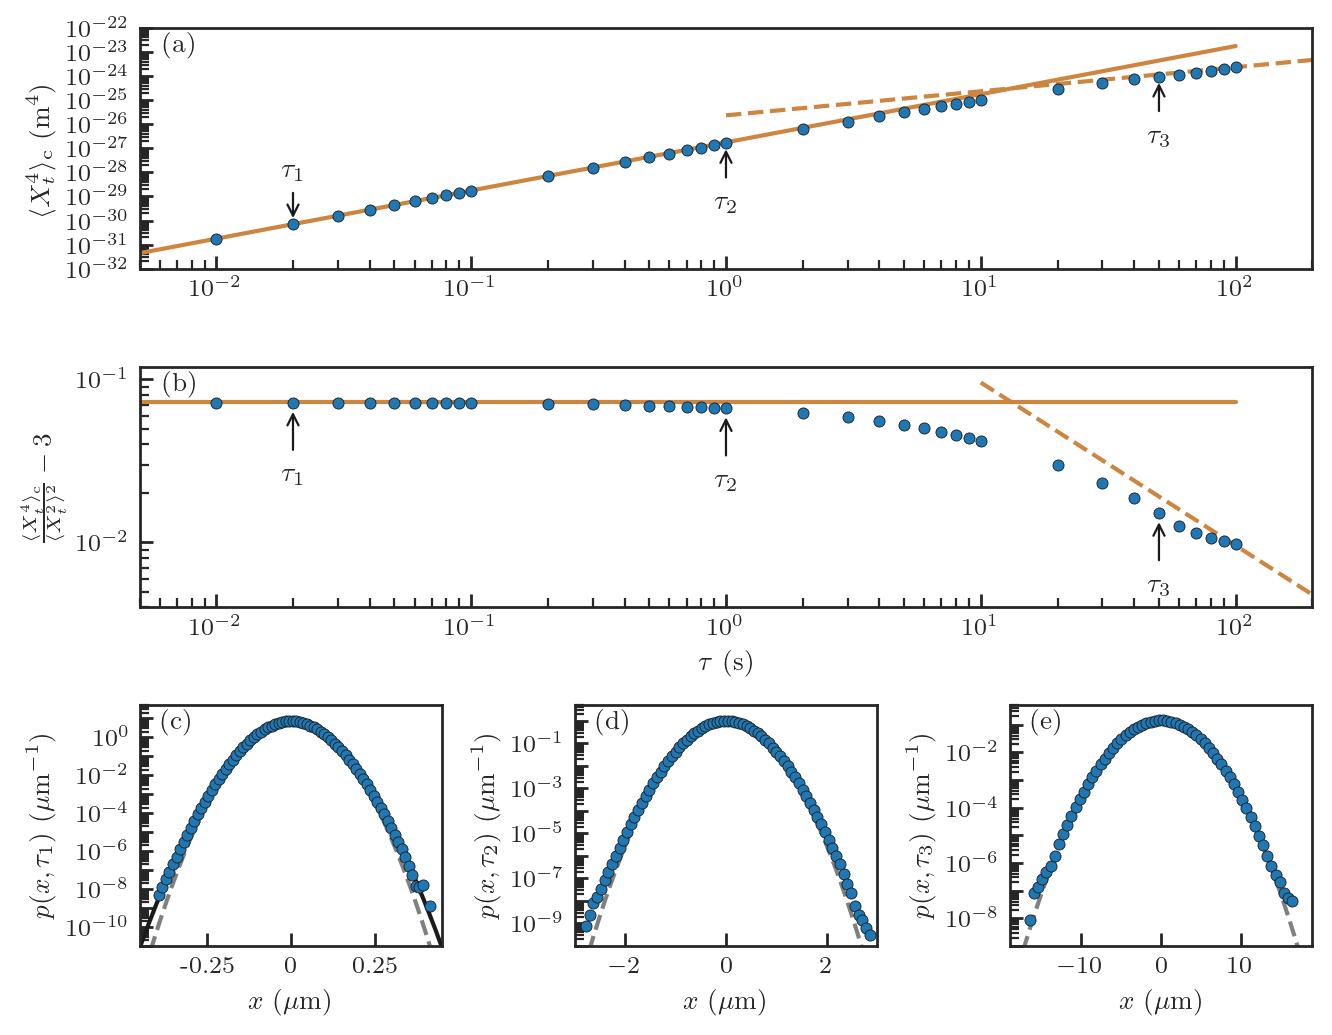

In [5]:
fig = plt.figure(figsize = (2*3.375, 10),  tight_layout=True)
gs = mpl.gridspec.GridSpec(6,6)



# C4
ax0 = plt.subplot(gs[0, :])
ax0.plot(dtCOURT, A4*dtCOURT**2, "-", color="peru", linewidth=1.5)
ax0.plot(dtLONG, D4*dtLONG-C4, "--", color="peru", linewidth=1.5)
ax0.loglog(time_simu, C4_simu, ".", color="tab:blue", markersize=8)
ax0.annotate(r"$\tau _1$", (time_simu[i_tau1], C4_simu[i_tau1]*1.05), 
             xytext=(time_simu[i_tau1], C4_simu[i_tau1]*100), ha="center",
            arrowprops=dict(arrowstyle = "->", lw = 0.8, color= "k"), fontsize=10)
ax0.annotate(r"$\tau _2$", (time_simu[i_tau2], C4_simu[i_tau2]/1.05), 
             xytext=(time_simu[i_tau2], C4_simu[i_tau2]/500), ha="center",
            arrowprops=dict(arrowstyle = "->", lw = 0.8, color= "k"), fontsize=10)
ax0.annotate(r"$\tau _3$", (time_simu[i_tau3], C4_simu[i_tau3]/1.05),
             xytext=(time_simu[i_tau3], C4_simu[i_tau3]/500), ha="center",
            arrowprops=dict(arrowstyle = "->", lw = 0.8, color= "k"), fontsize=10)
ax0.set(
    # xlabel = r"$\tau$ $(\mathrm{s})$",
    ylabel = r"$\langle X^4_t \rangle_\mathrm{c}$ $(\mathrm{m}^4)$",
)
ax0.set_xlim([5e-3, 2e2])
ax0.set_ylim([1e-32, 1e-22])
ax0.text(0.02, 0.9, r"(a)", transform=ax0.transAxes)
# ax0.set_title(r"$H=$ "+ str(H*1e6) + r" $\mu$m")
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax0.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,numticks=100)
ax0.yaxis.set_minor_locator(locmin)
ax0.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())





# KURTOSIS
ax0p5= plt.subplot(gs[1, :])
ax0p5.plot(dtCOURT, np.ones(len(dtCOURT))*A4/(4*Mean_Dpara**2), "-", color="peru", linewidth=1.5)
ax0p5.plot(np.linspace(1e1, 3e2, 1000), D4/(4*Mean_Dpara**2) / np.linspace(1e1, 3e2, 1000) , "--", color="peru", linewidth=1.5)
ax0p5.loglog(time_simu, Kurtosis_simu, ".", color="tab:blue", markersize=8)

ax0p5.annotate(r"$\tau _1$", (time_simu[i_tau1], Kurtosis_simu[i_tau1]/1.05), 
             xytext=(time_simu[i_tau1], Kurtosis_simu[i_tau1]/3), ha="center",
            arrowprops=dict(arrowstyle = "->", lw = 0.8, color= "k"), fontsize=10)
ax0p5.annotate(r"$\tau _2$", (time_simu[i_tau2], Kurtosis_simu[i_tau2]/1.05), 
             xytext=(time_simu[i_tau2], Kurtosis_simu[i_tau2]/3), ha="center",
            arrowprops=dict(arrowstyle = "->", lw = 0.8, color= "k"), fontsize=10)
ax0p5.annotate(r"$\tau _3$", (time_simu[i_tau3], Kurtosis_simu[i_tau3]/1.05),
             xytext=(time_simu[i_tau3], Kurtosis_simu[i_tau3]/3), ha="center",
            arrowprops=dict(arrowstyle = "->", lw = 0.8, color= "k"), fontsize=10)

ax0p5.set(
    xlabel = r"$\tau$ $(\mathrm{s})$",
    ylabel = r"$\frac{\langle X_t^4 \rangle_\mathrm{c} }{ \langle X_t^2 \rangle^2} - 3$",
)
ax0p5.set_xlim([5e-3, 2e2])
ax0p5.set_ylim([4e-3, 1.2e-1])
ax0p5.text(0.02, 0.9, r"(b)", transform=ax0p5.transAxes)
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax0p5.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax0p5.yaxis.set_minor_locator(locmin)
ax0p5.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())



#PDF1
ax1 = plt.subplot(gs[2, 0:2])
ax1.semilogy(dxx*1e6, PDF_theo_court/np.trapz(PDF_theo_court, dxx*1e6), "-k", linewidth=1.5,)
ax1.semilogy(dxCOURT*1e6, gauss1/np.trapz(gauss1, dxCOURT*1e6)  , "--", color="grey", linewidth=1.5,)
ax1.semilogy(dx_1*1e6, PDF1/np.trapz(PDF1, dx_1*1e6),".", color="tab:blue", markersize=8)
ax1.set_xlim([-0.45, 0.45])
ax1.set_ylim([1e-11, 5e1])
ax1.set(
    xlabel = r"$x$ ($\mu$m)",
    ylabel = r"$p( x, \tau_1)$ ($\mu$m$^{-1}$)",
)
ax1.text(0.07, 0.9, r"(c)", transform=ax1.transAxes)
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1, numticks=100)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())




# PDF2
ax2 =  plt.subplot(gs[2, 2:4])
ax2.semilogy(dxMID*1e6, gauss2/np.trapz(gauss2, dxMID*1e6) , "--", color="grey", linewidth=1.5,)
ax2.semilogy(dx_2*1e6, PDF2/np.trapz(PDF2, dx_2*1e6),".", color="tab:blue", markersize=8)
ax2.set_xlim(-3, 3)
ax2.set_ylim(1e-10, 5e0)
ax2.set(
    xlabel = r"$x$ ($\mu$m)",
    ylabel = r"$p( x, \tau_2)$ ($\mu$m$^{-1}$)",
)
ax2.text(0.07, 0.9, r"(d)", transform=ax2.transAxes)
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax2.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,numticks=100)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())






# PDF3
ax3 = plt.subplot(gs[2, 4:6])
ax3.semilogy(dxLONG*1e6, gauss3/np.trapz(gauss3, dxLONG*1e6) , "--", color="grey", linewidth=1.5,)
ax3.semilogy(dx_3*1e6, PDF3/ np.trapz(PDF3, dx_3*1e6), ".", color="tab:blue", markersize=8)
ax3.set_xlim(-19, 19)
ax3.set_ylim(1e-9, 5e-1)
ax3.set(
    xlabel = r"$x$ ($\mu$m)",
    ylabel = r"$p( x, \tau_3)$ ($\mu$m$^{-1}$)",
)
ax3.text(0.07, 0.9, r"(e)", transform=ax3.transAxes)
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax3.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1, numticks=100)
ax3.yaxis.set_minor_locator(locmin)
ax3.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())


ax3_ticks = ax3.get_yticklabels()
for i in ax3_ticks:
    i.set_visible(False)
    
for n, i in enumerate(ax3_ticks):
    if n%2==0:i.set_visible(True)
    

ax1_ticks = ax1.get_yticklabels()
for i in ax1_ticks:
    i.set_visible(False)
    
for n, i in enumerate(ax1_ticks):
    if n%2==0:i.set_visible(True)


###    
ax2_ticks = ax2.get_yticklabels()
for i in ax2_ticks:
    i.set_visible(False)
    
for n, i in enumerate(ax2_ticks):
    if n%2==0:i.set_visible(True)


locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax0.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax0.xaxis.set_minor_locator(locmin)
ax0.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax1.xaxis.set_major_formatter(FormatStrFormatter('%g'))


fig.tight_layout(pad = 0.001, h_pad=0.1)



fig.savefig("Simu_C4-Kurtosis-PDF_Petit-Gap_H-4micron_V2.pdf", bbox_inches = "tight")